In [181]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import inv

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\N}{\mathbb{N}}$

#  TP 3 : Schémas explicites pour les EDO

L'objectif de ce TP est de mettre en oeuvre différents schémas numériques pour approcher la solution d'une équation différentielle ordinaire. Nous allons considérer différents schémas numériques, dont certains  nous n'avons pas encore vus en cours. L'objectif est de comprendre ce que c'est une solution approchée donnée par une méthode numérique, mais aussi de comprendre des notions comme l' erreur entre la solution exacte et la solution approchée, la  convergence d'une méthode numérique et l' ordre de précision d'une méthode numérique



Dans ce TP on considère des équations différentielles ordinaires, ou des systèmes d'équations différentielles ordinaires, de la forme
\begin{equation}
\label{EDO}
\left\{\begin{aligned}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0,
\end{aligned} \right.
\tag{EDO}
\end{equation}

où $f$ : $I \times \R^n \longrightarrow \R^n$ est une
fonction dans les conditions du théorème de Cauchy-Lipschitz, avec $I\subseteq\R$ un intervalle ouvert de $\R$ et où $(t_0,y_0)\in I\times\R^n$ est donné. Le problème de Cauchy (EDO) admet alors une unique solution maximale définie dans un intervalle ouvert $J\subseteq I$.


On souhaite calculer une solution approchée de ce problème dans un intervalle de la forme $[t_0,t_f]=[t_0,t_0+T]\subseteq J$, avec $T>0$. Pour ce faire, on se donne $N\in\N$ et on considère une discrétisation de $[t_0,t_0+T]$ de pas $h=\frac TN,$ donnée par les points 
$$
t_0< t_1< \cdots <t_N=t_0+T,\ \ \ t_n=nh,\ n=0,\dots,N,
$$
et l'on utilise un schéma numérique afin de calculer une approximation $y^n$ de $y(t_n)$ pour $n=0,\dots,N$. 

Les schémas explicites qui suivent sont fréquemment utilisés pour discrétiser le problème (EDO). On pose $y^0=y_0,\,$ et, pour $n=0,\dots,N-1,$ 


- **Euler explicite** :   $y^{n+1}=y^{n}+h f(t_n,y^{n})$ où   $f^{n}=f(t_n,y^{n})$ ;

-  **Heun** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_n,y^{n})+f\big(t_n+h,y^{n}+h f(t_n,y^{n})\big)\big)$ où $p_1=f(t_n,y^{n})$ et $p_2=f(t_n+h,y^{n}+h p_1)$ ;




### Exercice 1
**Q1)** Écrire une fonction python de la forme `euler_exp(fct, t0, tf, y0, h)`

prenant en argument  `fct` la fonction $f(t,y)$ de (EDO), les extrémités `t0` et `tf` de l'intervalle de temps $[t_0,t_f]=[t_0,t_0+T],$ la donnée initiale `y0` et le pas de temps `h`. Cette fonction devra retourner deux tableaux :  

- `[t_0,\, t_1,\, ...,\, t_N]`, tableau  unidimensionnel de taille $(N+1)\times 1$ représentant la subdivision de l'intervalle $[t_0,t_f]$ de pas $h$ considérée, 

- `[y^0,\, y^1,\, ...,\, y^N]` tableau de taille $(N+1)\times n$ représentant la solution approchée aux instants $t_n,\ n=0,\dots,N.$

In [182]:
def euler_exp(fct, t0, tf, y0, h):
    t=np.arange(t0,tf+h,h)
    N=t.size
    y=np.zeros(N)
    y[0]=y0
    for n in range(N-1):
        y[n+1]=y[n]+h*fct(t[n],y[n])
    return (t,y)


**Q2)** Testez d'abord votre fonction `euler_exp` sur un exemple simple d'une EDO scalaire. Vous pouvez par exemple considérer le problème
\begin{equation}\label{edoexp}
\begin{cases}
y'(t)=y(t),\\
y(0)=1,
\end{cases}
\end{equation}
dont la solution est $y(t)=e^t.$ 

**Q2.a)** Tracer sur une même fenêtre graphique :

-  La solution exacte sur l'intervalle $[0,1]$ discrétisé avec un pas de temps de $10^{-4}$ (autrement dit, en remplaçant l'intervalle $[0,1]$ par l'ensemble discret correspondant aux points d'une sub-division de $[0,1]$ de pas $10^{-4}$) ;

- Les solutions approchées sur le même intervalle obtenues avec la méthode d'Euler avec des pas de temps $h$ égaux à $1/4,\ 1/10,\ 1/100.$ Observer que lorsque le pas diminue, la solution approchée est  *plus proche* de la solution exacte.

Text(0, 0.5, 'y')

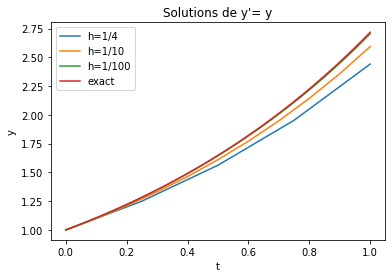

In [183]:
# <completer>
def f1(t,y):
    return(y)

(t4,y4) = euler_exp(f1, 0, 1, 1, 1/4)
(t10,y10) = euler_exp(f1, 0, 1, 1, 1/10)
(t100,y100) = euler_exp(f1, 0, 1, 1, 1/100)
y_exact = np.exp(t100)

plt.plot(t4,y4,label='h=1/4')
plt.plot(t10,y10,label='h=1/10')
plt.plot(t100,y100,label='h=1/100')
plt.plot(t100,y_exact,label='exact')

plt.title('Solutions de y\'= y')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')


**Q2.b)** Donner les valeurs approchées de $y(1)=e$ obtenues avec $h=1/10,\ 1/100,\ 1/1000$, et donner les erreurs entre la valeur exacte de $e$ et les valeurs approchées obtenues avec ces pas de temps. Observer la décroissance de l'erreur lorsque le pas de temps diminue.

**Q2.c)** Tracer, sur une autre figure, la différence en valeur absolue entre la solution exacte et la solution approchée, en fonction du temps **(i.e. $|y(t_n)-y^n|$ en fonction de $t_n$)**, en utilisant des discrétisations de $[0,1]$ avec des pas de temps $h$ égaux à $1/10,\ 1/100,\ 1/1000.$ **Vous devez alors tracer trois courbes et observer que lorsque le pas diminue, cette différence s'approche de plus en plus de 0.**

y(1), h=1/10   : 2.593742, erreur : 0.124539
y(1), h=1/100  : 2.704814, erreur : 0.013468
y(1), h=1/1000 : 2.716924, erreur : 0.001358


Text(0, 0.5, 'y')

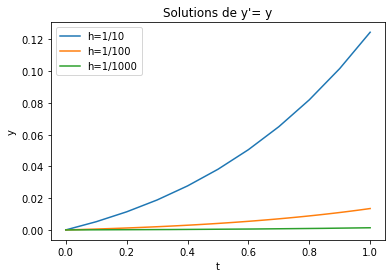

In [184]:
# <completer>
(t10,y10) = euler_exp(f1, 0, 1, 1, 1/10)
(t100,y100) = euler_exp(f1, 0, 1, 1, 1/100)
(t1000,y1000) = euler_exp(f1, 0, 1, 1, 1/1000)


print("y(1), h=1/10   : %f, erreur : %f" % (y10[-1], np.absolute(np.exp(1)-y10[-1])))
print("y(1), h=1/100  : %f, erreur : %f" % (y100[-1], np.absolute(np.exp(1)-y100[-1])))
print("y(1), h=1/1000 : %f, erreur : %f" % (y1000[-1], np.absolute(np.exp(1)-y1000[-1])))


err10 = y10-np.exp(t10)
err100 = y100-np.exp(t100)
err1000 = y1000-np.exp(t1000)

plt.plot(t10,np.absolute(err10),label='h=1/10')
plt.plot(t100,np.absolute(err100),label='h=1/100')
plt.plot(t1000,np.absolute(err1000),label='h=1/1000')
plt.title('Solutions de y\'= y')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')


**Q3)** Testez votre fonction `euler_exp` sur le modèle logistique
$$
(P_1)\ \ \ \ 
\begin{cases}
y'(t)=c y (1 - \frac{y}{b}),\\
y(0)=a,
\end{cases}
$$
dont la solution exacte est
$$
y(t) = \frac{b}{1 + \frac{b-a}{a} e^{-ct}},
$$
avec les données $c=1$, $b=2$, $a=0.1$, dans l'intervalle $[0,15]$, avec un pas $h=0.2$. Tracer sur la même fenêtre la solution exacte et la solution approchée, obtenue avec le pas $h$ et avec un pas égal à $\frac h2$.

Text(0, 0.5, 'y')

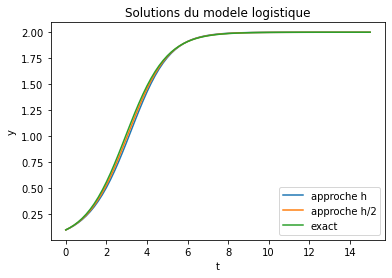

In [185]:

a=0.1
b=2
c=1
h=0.2

def fp1(t,y):
    return c*y*(1-y/b)

(t1,y1) = euler_exp(fp1, 0, 15, a, h)
(t2,y2) = euler_exp(fp1, 0, 15, a, h/2)

c1 = (b-a)/a
#y_exact = b/(1+((b-a)/a)*np.exp(-c*t1))
y_exact = b/(1+c1*np.exp(-c*t1))

plt.plot(t1,y1,label='approche h')
plt.plot(t2,y2,label='approche h/2')
plt.plot(t1,y_exact,label='exact')
plt.title('Solutions du modele logistique')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')

**Q4)** Testez ensuite votre fonction dans le cas vectoriel $n>1$ ($n=2$) sur le problème
$$
(P_2)\ \ \ \
\begin{cases}
y''(t)  =    -y(t) + \cos(t)  \\
y(0)  =   5,\ \ y'(0)  =   1,  
\end{cases}
$$
dont la solution exacte est 

$$
y(t) = \frac{1}{2} \sin(t) t  + 5 \cos(t) + \sin(t),
$$

dans l'intervalle $[0,15]$, avec un pas  $h=0.2$.\\
Pour ce faire, il faut écrire l'équation d'ordre 2 de $(P_2)$ sous la forme d'un système de deux équations d'ordre 1 dans les nouvelles variables $u(t)=y(t)$ et $v(t)=y'(t)$. On se ramènera alors à la résolution d'une équation de la forme

$$
X'=F(t,X),\ \ \ \textrm{avec}\ X=(u,v)=(y,y')^T.
$$

Représenter à nouveau la solution exacte et la solution approchée dans une même fenêtre graphique.

**Remarque :** La solution $y$ de $(P_2)$ correspond à la première composante du vecteur $X$ ci-dessus. Votre fonction `euler_ex`! retournera dans ce cas, si vous avez respecté la structure conseillée, un tableau de taille $(N+1)\times2$, $N$ étant le nombre de points de la discrétisation. Ce tableau donne les valeurs approchées de $X$ au points de la discrétisation considérée, la première colonne correspondant à la première composante de $X$, la seconde à la seconde composante de $X$. La solution approchée de $(P_2)$ que l'on cherche correspond alors à la première colonne de ce tableau.

In [186]:
def fp2(t,X):
    r = np.zeros(2)
    r[0] = X[1]
    r[1] = -X[0] + np.cos(t)
    return(r)

def euler_exp2(fct, t0, tf, y0, h):
    t=np.arange(t0,tf+h,h)
    N=t.size
    x=np.zeros((N,2))
    x[0][0]=y0[0]
    x[0][1]=y0[1]
    for n in range(N-1):
        x[n+1]=x[n]+h*fct(t[n],x[n])
    return (t, x)


Text(0, 0.5, 'y')

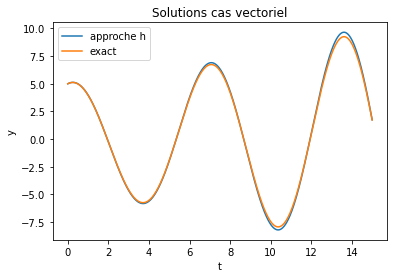

In [187]:
(t,y)=euler_exp2(fp2,0,15,np.array([5,1]),0.01)
y_exact = 0.5*t*np.sin(t)+5*np.cos(t)+np.sin(t)

plt.plot(t,y[:,0], label='approche h')
plt.plot(t,y_exact,label='exact')
plt.title('Solutions cas vectoriel')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')


### Exercice 2 : Étude de l'erreur et convergence du schéma d'Euler explicite

 Dans cet exercice on essaie de comprendre ce que c'est l'erreur associé à un schéma numérique et ce que c'est un schéma numérique convergent.
 
On se donne un problème de Cauchy de la forme (EDO) et une méthode numérique pour approcher la solution de (EDO) dans un intervalle de la forme $[t_0,t_0+T]$. Pour un certain pas de temps $h$ fixé (ou pour un certain nombre de points de la discrétisation $N$ fixé), l'erreur globale entre la solution approchée associée à une discrétisation de pas $h$ de l'intervalle $[t_0,t_0+T]$ et la solution exacte est donnée par :

\begin{equation*}
E_h =  \max_{k=0,\cdots,N}( |y(t_k)-y^{k}|). 
\end{equation*}

Ci dessus, $y(t_k)$ est la solution exacte à l'instant $t_k$ et $y^{k}$ la valeur approchée de $y(t^k),$ donnée par le schéma numérique.

**Remarque 1 :**  l'erreur globale $E$ dépend du pas $h$, ou, de manière équivalente, du nombre de points $N$ de la discrétisation. Pour des valeurs de $N$ différentes, ou de manière équivalente pour des valeurs de $h$ différentes, les  discrétisations de l'intervalle $[t_0,t_0+T]$ sont différentes (elles ont un nombre de points différent), et les solutions approchées sont différentes. On s'attend à que, lorsque $N$ augmente, ou de manière équivalente lorsque $h$ diminue, l'erreur $E_h$ diminue, puisque l'on considère dans ce cas de plus en plus de points dans la discrétisation de l'intervalle $[t_0,t_0+T]$ et les approximations que l'on a faites pour construire le schéma numérique deviennent alors de plus en plus précises.

**Remarque 2 :** Parfois dans la littérature on ne spécifie pas la dépendance de $E$ par rapport à $h$, mais on doit toujours garder à l'esprit cette dépendance et que l'erreur est donc une fonction de $h$

Considérons le problème
$$
(P_3)\ \ \ \
\begin{cases}
y'(t)=\frac{\cos(t)-y(t)}{1+t},\\
y(0)=-\frac14, 
\end{cases}
$$
dont la solution exacte est 
$$
y(t) = \frac{\sin(t)-1/4}{1 + t}.
$$

**Q1)** Calculez les solutions approchées de $(P_3)$ obtenues avec le schéma d'Euler explicite, avec $h=1/2^s$ pour $s = 1,2,...,8$ ; représentez dans la même figure la différence en valeur absolue entre la solution exacte et la solution approchée, en fonction du temps, pour chaque valeur de $h$.

Text(0, 0.5, 'y')

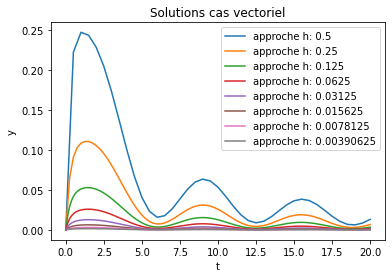

In [188]:
def fp3(t,y):
    return((np.cos(t)-y)/(1+t))

for s in range(1,9):
    (t,y) = euler_exp(fp3,0,20,-0.25,(0.5)**s)
    y_exact = (np.sin(t)-0.25)/(1+t)
    plt.plot(t,np.absolute(y-y_exact), label=f"approche h: {(0.5)**s}")

plt.title('Solutions cas vectoriel')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')

**Q2)** Calculer, pour chaque valeur de $h=1/2^s,\ s = 1,2,...,8,$ l'erreur globale $E_h$ correspondante. Vérifiez que $E_h$ diminue et s'approche de $0$ lorsque $h$ diminue.

**On dira qu'une méthode numérique converge si $\displaystyle{\lim_{h\to0}E_h}=0$.**

Représentez ensuite, en échelle logarithmique, l'erreur en fonction du pas de temps $h$, autrement dit, représentez $\log(E_h)$ en fonction de $\log(h)$. Vous devez obtenir des points qui sont à peu près alignés sur une droite de pente 1. Vérifiez graphiquement que c'est le cas, en estimant la pente de la droite passant au plus prêt des points (ou en représentant une droite de pente $1$ qui passe par un des points et en vérifiant que tous les points sont à peu près sur cette droite).

*Ceci signifie que $\log(E_h) \sim C+\log(h)$ et donc que $E_h\sim \widetilde{C}h$, pour certaines constantes $C$ et $\widetilde{C}$. On dit que la méthode d'Euler explicite est d' ordre 1 : c'est l'ordre de la puissance de $h$ dans cette relation. On a donc que l'erreur globale $E_h$ tend vers 0 comme $h$. L'ordre d'une méthode donne une indication sur sa vitesse de convergence. Une méthode d'ordre $p$ est une méthode dont l'erreur globale tend vers $0$ comme $h^p$. Donc plus l'ordre est élevé, plus la méthode converge plus vite*

**Remarque :** pour étudier numériquement l'ordre d'une méthode, on utilise souvent l'échelle logarithmique pour tracer l'erreur en fonction du pas de discrétisation $h$. La pente de la droite obtenue donne l'ordre $p$ de la méthode : si $E_h \sim Ch^p$ alors $\log(E_h)\sim \log(C) + p\log(h)$.

Erreur (h=0.500000) : 0.607669
Erreur (h=0.250000) : 0.957027
Erreur (h=0.125000) : 1.277350
Erreur (h=0.062500) : 1.587417
Erreur (h=0.031250) : 1.892862
Erreur (h=0.015625) : 2.196075
Erreur (h=0.007812) : 2.498190
Erreur (h=0.003906) : 2.799759
Pente : 1.040281


Text(0, 0.5, '-err_h')

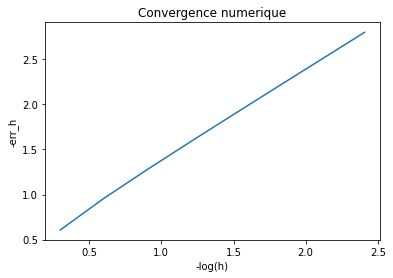

In [189]:
nb = 8
log_h = np.zeros(nb)
err_h = np.zeros(nb)

for s in range(1,nb+1):
    h = (0.5)**s
    (t,y) = euler_exp(fp3,0,20,-0.25,h)
    y_exact = (np.sin(t)-0.25)/(1+t)
    err_h[s-1] = -np.log10(np.max(np.absolute(y-y_exact)))
    print("Erreur (h=%f) : %f" % (h, err_h[s-1]))
    log_h[s-1] = -np.log10(h)
    
print("Pente : %f" % ((err_h[-1]-err_h[0])/(log_h[-1]-log_h[0])))

plt.plot(log_h,err_h)
plt.title('Convergence numerique')
plt.xlabel('-log(h)')
plt.ylabel('-err_h')

### Exercice 3 : Un schéma d'ordre 2

**Q1)** À l'image de ce que vous avez fait pour le schéma d'Euler explicite, écrire une fonction python de la forme `Heun(fct, t0, tf, y0, h)` prenant les mêmes arguments que la fonction `euler_exp` et retournant les mêmes tableaux. 

In [190]:

def heun(fct, t0, tf, y0, h):
    t=np.arange(t0,tf+h,h)
    N=t.size
    y=np.zeros(N)
    y[0]=y0
    for n in range(N-1):
        p1 = fct(t[n],y[n])
        y[n+1]=y[n]+h/2*(p1+fct(t[n]+h,y[n]+h*p1))
    return (t,y)


**Q2)** Pour le problème $(P_1),$ comparez les solutions approchées obtenues avec la méthode d'Euler explicite et avec la méthode de Heun avec le même pas de temps. Pour ce faire, représenter dans la même fenêtre graphique la solution exacte et les solutions approchées obtenues avec chacune des méthodes. Quelle méthode semble être plus précise ? Pour le confirmer, représenter dans une autre figure la différence, en valeur absolue, entre la solution exacte et la solution approchée, pour les deux méthodes.

Text(0, 0.5, 'y')

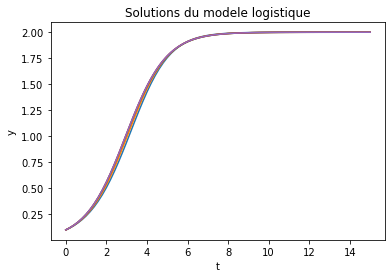

In [191]:
a=0.1
b=2
c=1
h=0.2

def fp1(t,y):
    return c*y*(1-y/b)

(t1,ye1) = euler_exp(fp1, 0, 15, a, h)
(t2,ye2) = euler_exp(fp1, 0, 15, a, h/2)

(t1,yh1) = heun(fp1, 0, 15, a, h)
(t2,yh2) = heun(fp1, 0, 15, a, h/2)

y_exact = b/(1+((b-a)/a)*np.exp(-c*t1))

plt.plot(t1,ye1,label='Euler approche h')
plt.plot(t2,ye2,label='Euler approche h/2')
plt.plot(t1,yh1,label='Heun approche h')
plt.plot(t2,yh2,label='Heun approche h/2')
plt.plot(t1,y_exact,label='exact')
plt.title('Solutions du modele logistique')
plt.xlabel('t')
plt.ylabel('y')


Text(0, 0.5, 'err')

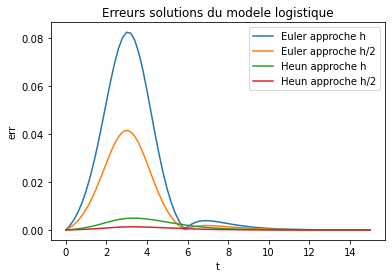

In [192]:
a=0.1
b=2
c=1
h=0.2

def fp1(t,y):
    return c*y*(1-y/b)

(t1,ye1) = euler_exp(fp1, 0, 15, a, h)
(t2,ye2) = euler_exp(fp1, 0, 15, a, h/2)

(t1,yh1) = heun(fp1, 0, 15, a, h)
(t2,yh2) = heun(fp1, 0, 15, a, h/2)

y_exact1 = b/(1+((b-a)/a)*np.exp(-c*t1))
y_exact2 = b/(1+((b-a)/a)*np.exp(-c*t2))

plt.plot(t1,np.absolute(ye1-y_exact1),label='Euler approche h')
plt.plot(t2,np.absolute(ye2-y_exact2),label='Euler approche h/2')
plt.plot(t1,np.absolute(yh1-y_exact1),label='Heun approche h')
plt.plot(t2,np.absolute(yh2-y_exact2),label='Heun approche h/2')
plt.title('Erreurs solutions du modele logistique')
plt.legend()
plt.xlabel('t')
plt.ylabel('err')

**Q3)** Reprenez l'exercice **2** pour la méthode de Heun. Vérifiez graphiquement que cette méthode est d'ordre $2,$ en représentant l'erreur globale en fonction du pas de discrétisation en échelle logarithmique et en estimant la pente de la droite passant au plus prêt des points correspondant à cette représentation ou en représentant une droite de pente $2$ qui passe par un des points.

Text(0, 0.5, 'y')

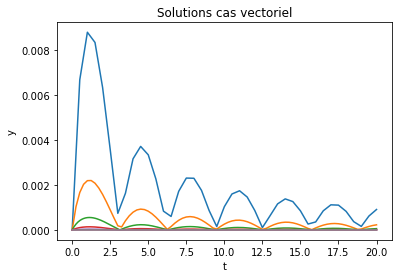

In [193]:
def fp3(t,y):
    return((np.cos(t)-y)/(1+t))

for s in range(1,9):
    (t,y) = heun(fp3,0,20,-0.25,(0.5)**s)
    y_exact = (np.sin(t)-0.25)/(1+t)
    plt.plot(t,np.absolute(y-y_exact), label=f"approche h: {(0.5)**s}")

plt.title('Solutions cas vectoriel')
plt.xlabel('t')
plt.ylabel('y')

Erreur (h=0.500000) : 2.055415
Erreur (h=0.250000) : 2.657772
Erreur (h=0.125000) : 3.257272
Erreur (h=0.062500) : 3.859417
Erreur (h=0.031250) : 4.461498
Erreur (h=0.015625) : 5.063563
Erreur (h=0.007812) : 5.665613
Erreur (h=0.003906) : 6.267673
Pente : 1.998974


Text(0, 0.5, '-err_h')

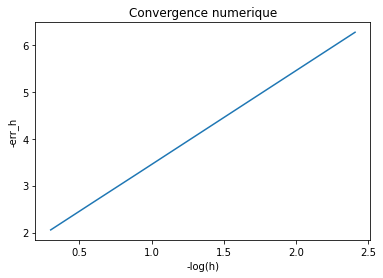

In [194]:
nb = 8
log_h = np.zeros(nb)
err_h = np.zeros(nb)

for s in range(1,nb+1):
    h = (0.5)**s
    (t,y) = heun(fp3,0,20,-0.25,h)
    y_exact = (np.sin(t)-0.25)/(1+t)
    err_h[s-1] = -np.log10(np.max(np.absolute(y-y_exact)))
    print("Erreur (h=%f) : %f" % (h, err_h[s-1]))
    log_h[s-1] = -np.log10(h)
    
print("Pente : %f" % ((err_h[-1]-err_h[0])/(log_h[-1]-log_h[0])))

plt.plot(log_h,err_h)
plt.title('Convergence numerique')
plt.xlabel('-log(h)')
plt.ylabel('-err_h')

